PCA: Principal Component Analysis - An unsupervised technique which can be used for feature extraction or dimesionality reduction in Machine Learning application

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

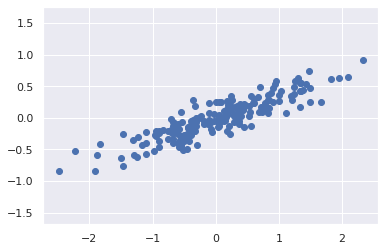

In [3]:
rand_state = np.random.RandomState(1)
X = np.dot(rand_state.rand(2, 2), rand_state.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

In [4]:
X.shape

(200, 2)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
pca.components_

array([[-0.94446029, -0.32862557],
       [-0.32862557,  0.94446029]])

In [8]:
pca.explained_variance_ratio_

array([0.97634101, 0.02365899])

In [9]:
pca.explained_variance_

array([0.7625315, 0.0184779])

In [10]:
pca.mean_

array([ 0.03351168, -0.00408072])

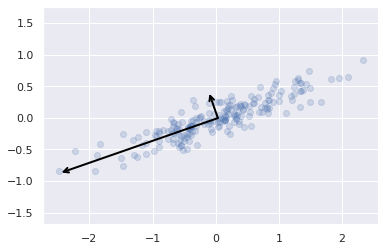

In [11]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

PCA as Dimensionality Reduction method

In [12]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

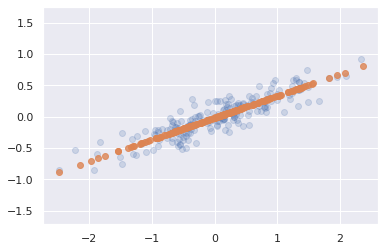

In [13]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

how to get the number of principal components

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [15]:
digits.data.min(),digits.data.max()

(0.0, 16.0)

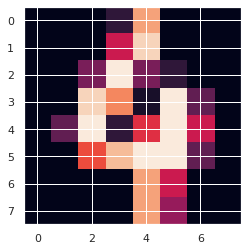

In [16]:
plt.imshow(digits.data[100].reshape(8,8))

Text(0, 0.5, 'cumulative explained variance')

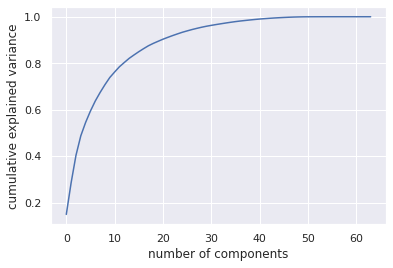

In [17]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [18]:
pca.transform(digits.data)

array([[-1.25946645e+00,  2.12748835e+01, -9.46305462e+00, ...,
        -3.00115784e-15, -4.31732172e-16, -6.91392699e-16],
       [ 7.95761130e+00, -2.07686990e+01,  4.43950604e+00, ...,
         1.70203623e-15, -7.18938030e-16,  1.67046393e-16],
       [ 6.99192297e+00, -9.95598641e+00,  2.95855808e+00, ...,
        -1.26266286e-15, -2.39850095e-15,  1.16654252e-16],
       ...,
       [ 1.08012837e+01, -6.96025223e+00,  5.59955453e+00, ...,
         3.11071142e-15,  8.63066186e-16,  9.70809841e-17],
       [-4.87210009e+00,  1.24239536e+01, -1.01708664e+01, ...,
         2.39767124e-15,  2.95002205e-16, -1.23762878e-16],
       [-3.44389631e-01,  6.36554919e+00,  1.07737085e+01, ...,
        -1.05087579e-15, -9.68952900e-16,  2.70670966e-16]])

**SVM - Support Vector Machines**

Facial Recognition using SVM and PCA



In [19]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


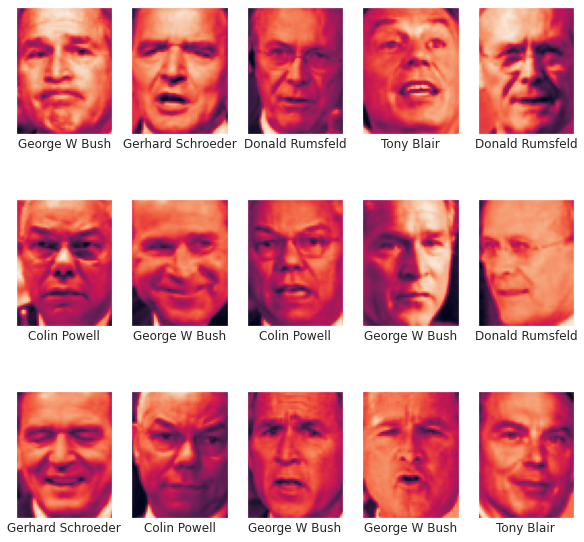

In [20]:
fig, ax = plt.subplots(3, 5, figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i])
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [21]:
62*47

2914

In [23]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=150, random_state=50, whiten=True)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [25]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, test_size=0.2, random_state=50)

In [26]:
Xtrain.shape

(912, 2914)

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time 
grid.fit(Xtrain, ytrain)
print(grid.best_params_)


CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 8.11 µs
{'svc__C': 1, 'svc__gamma': 0.005}


In [30]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

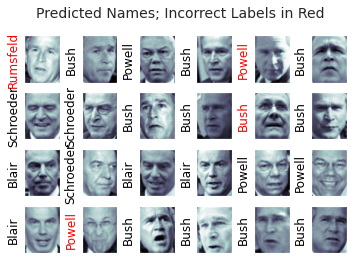

In [31]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.81      0.96      0.88        45
  Donald Rumsfeld       0.88      0.67      0.76        21
    George W Bush       0.89      0.93      0.91       102
Gerhard Schroeder       0.85      0.85      0.85        26
       Tony Blair       0.88      0.68      0.77        34

         accuracy                           0.86       228
        macro avg       0.86      0.82      0.83       228
     weighted avg       0.87      0.86      0.86       228



Text(89.18, 0.5, 'predicted label')

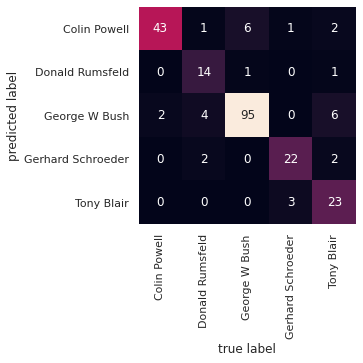

In [33]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')